In [1]:
# This is a set of scripts to explore a MVPA analysis with Smith and Wang
# Python 2
# First thing is importing the libraries
import nilearn
from nilearn import datasets,image,masking,signal,plotting,input_data
import numpy as np
import pandas as pd
import sklearn as skl
import os
os.chdir('../')

/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  after removing the cwd from sys.path.
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/graph.py:15: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .graph_shortest_path import graph_shortest_path  # noqa
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset impo

In [2]:
#Second thing is getting the data
# Gonna download 2 sets of masks that we may use
sub_cort_HO=datasets.fetch_atlas_harvard_oxford(
    'sub-prob-2mm')
pauli=datasets.fetch_atlas_pauli_2017()
#List of z_images
func_list=[]
label_list=[]
#List of labels
sublist=os.listdir('data')
for sub in sublist:
    print sub
    func_list.append('data/%s/%s_func.nii.gz'%(sub,sub))
    label_list.append(
        pd.read_csv('data/%s/%s_labels.csv'%(sub,sub)
                   ,sep='\t'))
for df in label_list:
    df['high_low']=df.apply(lambda row: np.greater(row[3],2.5),axis=1 )

sub-119
sub-118
sub-107
sub-113
sub-106
sub-112
sub-125
sub-123
sub-108
sub-111
sub-115
sub-117
sub-120
sub-116
sub-114
sub-109
sub-121
sub-122
sub-104
sub-110


sub-119
data/sub-119/sub-119_func.nii.gz


,Unnamed: 0,0,1,2,3,type,run,high_low
0,0,1.0,1.0,3.0,0.0,a,1,True
1,1,2.0,1.0,1.0,0.0,a,1,False
2,2,3.0,1.0,2.0,0.0,a,1,False
3,3,4.0,1.0,2.0,0.0,a,1,False
4,4,5.0,1.0,2.0,0.0,a,1,False


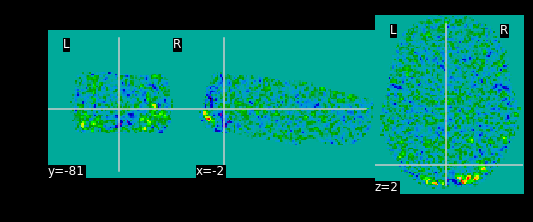

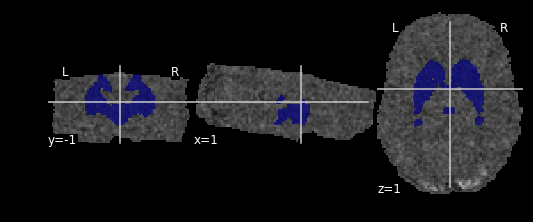

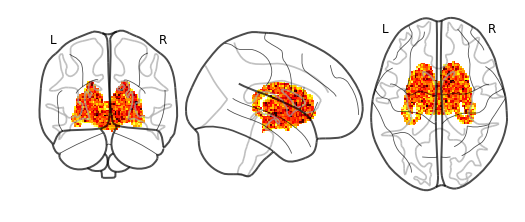

In [3]:
#Let's check out our data and masks
#the behavioral is hopefully easiest to verify
print(sublist[0])
#we can check manually if we want that
#this is correct. It is
print(func_list[0])
display(label_list[0].head())
func=image.load_img(func_list[0])
mean_img=image.image.mean_img(func)
plotting.plot_epi(mean_img)
small_mask=masking.compute_background_mask(
    image.resample_to_img(pauli.maps,mean_img,interpolation='linear'))
plotting.plot_roi(small_mask,mean_img)
masker=input_data.NiftiMasker(small_mask)
masked_img=masker.fit_transform(func)
plotting.plot_glass_brain(image.image.mean_img(
    masker.inverse_transform(masked_img)))

['Pu', 'Ca', 'NAC', 'EXA', 'GPe', 'GPi', 'SNc', 'RN', 'SNr', 'PBP', 'VTA', 'VeP', 'HN', 'HTH', 'MN', 'STH']


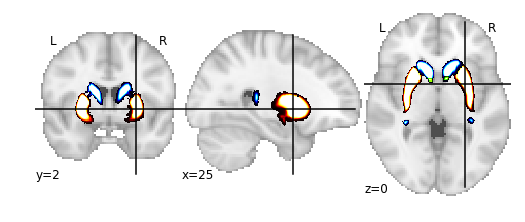

In [14]:
print(pauli.labels)
display=plotting.plot_stat_map(image.index_img(pauli.maps,0),colorbar=False)
display.add_overlay(image.index_img(pauli.maps,1),
                   cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(pauli.maps,2),
                   cmap=plotting.cm.black_green)
plotting.show()

In [16]:
haxby_dataset=datasets.fetch_haxby()

Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (82 seconds, 1 min)
Extracting data from /home/local/TU/tuj71575/nilearn_data/haxby2001/7ce123fbe1cfffa4d610772008fbb076/subj2-2010.01.14.tar.gz..... done.


In [27]:
mask=haxby_dataset.mask
from nilearn.input_data import NiftiMasker
masker=NiftiMasker(mask_img=mask)